### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter
%matplotlib inline
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv


### Dataset Reading

In [2]:
df = pd.read_csv('/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv')

In [3]:
df

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012
...,...,...,...,...,...,...,...
995,996,XO TEAM,"11,500,000","11,471,384,709","2,679",People & Blogs,2021
996,997,Nirahua Music World,"11,500,000","5,997,717,755",788,Music,2014
997,998,YtCrash,"11,400,000","3,825,084",1,Education,2015
998,999,Painzeiro,"11,400,000","2,143,444,281",946,People & Blogs,2015


In [4]:
df.columns

Index(['Rank', 'Youtube Channel', 'Subscribers', 'Video Views', 'Video Count',
       'Category', 'Started'],
      dtype='object')

In [5]:
df.shape

(1000, 7)

In [6]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [7]:
df.tail()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
995,996,XO TEAM,"11,500,000","11,471,384,709","2,679",People & Blogs,2021
996,997,Nirahua Music World,"11,500,000","5,997,717,755",788,Music,2014
997,998,YtCrash,"11,400,000","3,825,084",1,Education,2015
998,999,Painzeiro,"11,400,000","2,143,444,281",946,People & Blogs,2015
999,1000,Oum Walid,"11,400,000","2,480,064,722","1,598",People & Blogs,2015


In [8]:
df.sample(5)

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
54,55,whinderssonnunes,"44,000,000","4,179,250,874",524,Comedy,2013
117,118,PowerKids TV,"32,800,000","16,678,003,928","3,818",Film & Animation,2014
700,701,ABC News,"14,000,000","12,266,150,289","76,462",News & Politics,2006
238,239,netd müzik,"23,500,000","53,386,751,228","21,930",Music,2014
869,870,Heroindori,"12,400,000","6,487,369,114",336,Comedy,2020


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [10]:
df.describe()

,Rank,Started
count,1000.000000,1000.000000
mean,500.500000,2012.594000
std,288.819436,4.110238
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


### Data Cleaning

In [11]:
df.isna().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

There is no null values present

##### We need to change the data type of fields "Subscribers", "Video Views", "Video Count" to int64

In [12]:
df.duplicated().sum()

0

There is no duplicate value present

In [13]:
cols = ["Subscribers", "Video Views", "Video Count"]

In [14]:
for col in cols:
    df[col] = df[col].str.replace(",","")

for col in cols:
    df[col] = df[col].astype("int64")

In [15]:
for col in cols:
    print(f"{col} : {df[col].dtype}")

Subscribers : int64
Video Views : int64
Video Count : int64


In [16]:
df['Category'].nunique()

19

In [17]:
df['Category'].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [18]:
df['Category']=df['Category'].str.replace('https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', "Other")

/tmp/ipykernel_500/3814704174.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Category']=df['Category'].str.replace('https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', "Other")


In [19]:
df['Category'].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'Other', 'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [20]:
df[df['Video Views'] == 0]

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
5,6,Music,118000000,0,0,Other,2013
9,10,Gaming,93300000,0,0,Other,2013
17,18,Sports,75100000,0,0,Other,2013
91,92,News,36300000,0,0,Other,2013
154,155,Popular on YouTube,29300000,0,0,Other,2013
357,358,Minecraft - Topic,19500000,0,0,Other,2013
550,551,Live,15700000,0,0,Other,2015
971,972,Machinima,11600000,0,0,Film & Animation,2006


Let's just skip these channels which don't have video views

In [21]:
df = df[df['Video Views'] != 0]
df.shape[0]

991

In [22]:
df['Category'].value_counts()

Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          48
Education                 45
Howto & Style             43
News & Politics           27
Other                     23
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: Category, dtype: int64

In [23]:
df['Started'].value_counts()

2014    120
2015     93
2011     87
2013     82
2012     81
2016     76
2006     68
2017     62
2009     59
2018     50
2010     45
2007     45
2008     45
2019     30
2005     21
2020     15
2021     11
1970      1
Name: Started, dtype: int64

The value '1970' looks outlier here so let's treat it

In [24]:
df[df['Started']==1970]

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
99,100,YouTube,35200000,2980922779,620,News & Politics,1970


As YouTube is launched on February 14, 2005 this clearly looks outlier. So let's drop this row

In [25]:
df.drop(df[df['Started'] == 1970].index, axis = 0, inplace = True)

/tmp/ipykernel_500/4188218411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Started'] == 1970].index, axis = 0, inplace = True)


In [26]:
(df['Started'] == 1970).any()

False

In [27]:
df.describe()

,Rank,Subscribers,Video Views,Video Count,Started
count,990.000000,9.900000e+02,9.900000e+02,990.000000,990.000000
mean,503.268687,2.119838e+07,1.009286e+10,9510.715152,2012.636364
std,287.359973,1.553383e+07,1.303395e+10,32339.424809,3.895123
min,1.000000,1.140000e+07,4.390980e+05,1.000000,2005.000000
25%,255.250000,1.332500e+07,3.964725e+09,379.500000,2010.000000
50%,503.500000,1.660000e+07,6.775084e+09,911.500000,2013.000000
75%,751.750000,2.297500e+07,1.227083e+10,3323.500000,2015.000000
max,1000.000000,2.340000e+08,2.129003e+11,342802.000000,2021.000000


In [28]:
df.shape

(990, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             990 non-null    int64 
 1   Youtube Channel  990 non-null    object
 2   Subscribers      990 non-null    int64 
 3   Video Views      990 non-null    int64 
 4   Video Count      990 non-null    int64 
 5   Category         990 non-null    object
 6   Started          990 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 61.9+ KB


##### Data looks clean now. So let's start our visualization😊

### Analysis

/tmp/ipykernel_500/2043374149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, center=True);


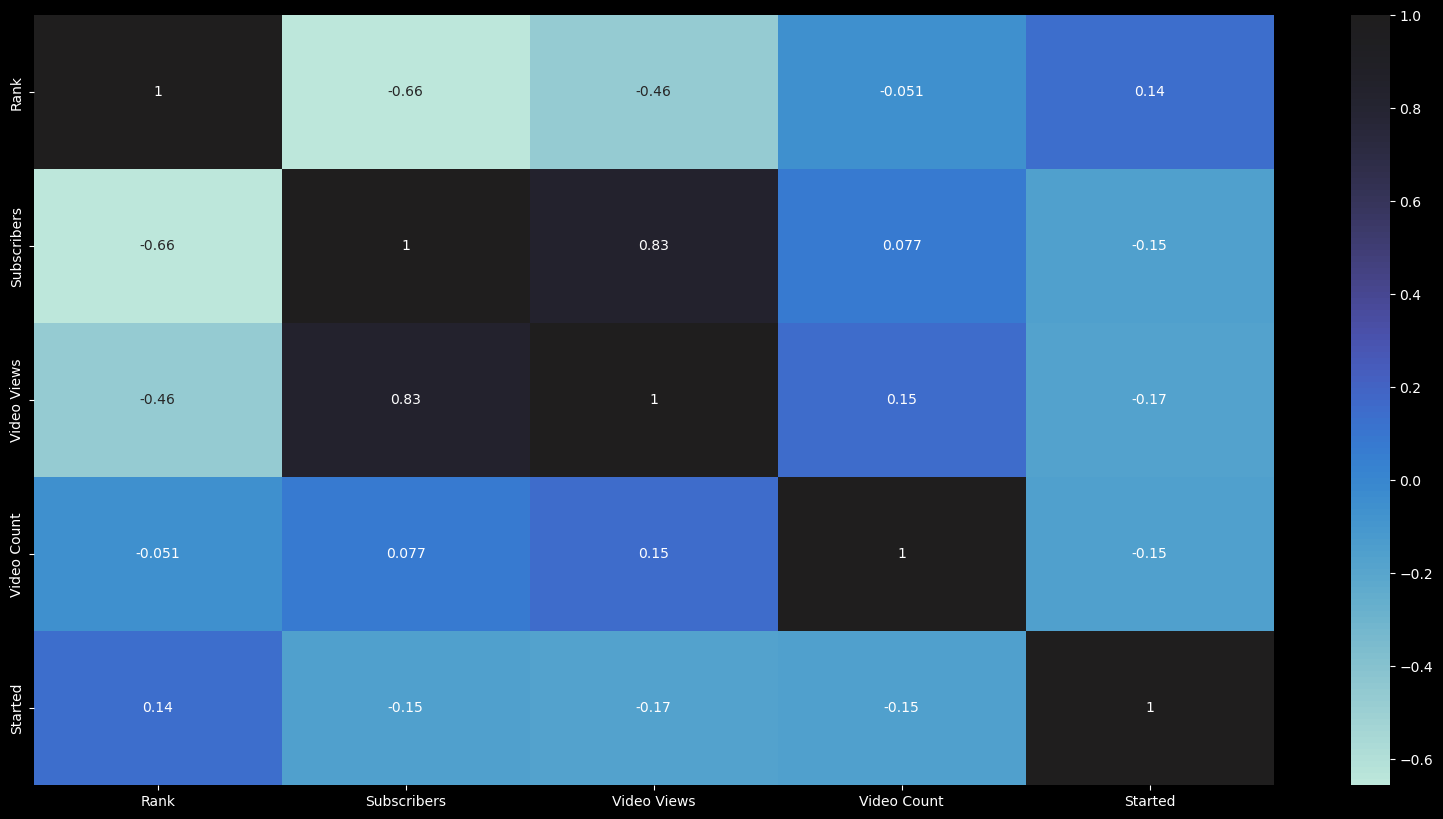

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, center=True);

#### Number of Channels Started Over the Years

Text(0, -10, 'Min: 11')

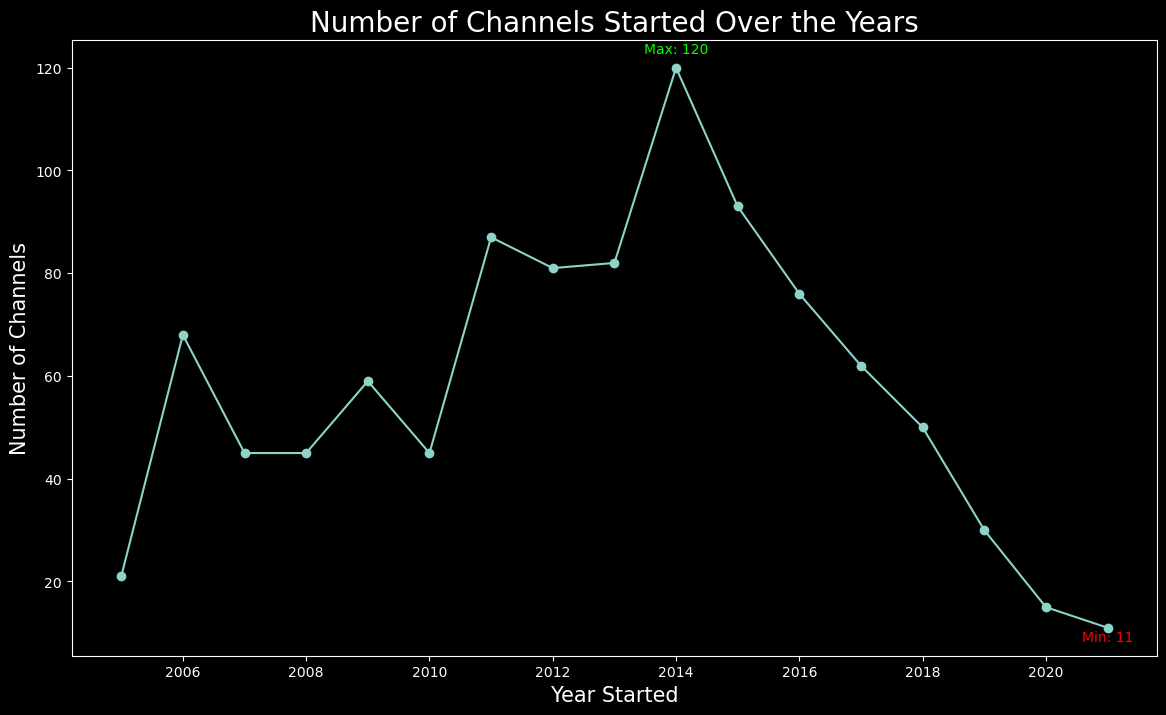

In [31]:
channels_started = df.groupby('Started').size()
plt.figure(figsize=(14, 8))
channels_started.plot(marker='o')
plt.title('Number of Channels Started Over the Years', fontsize=20)
plt.xlabel('Year Started', fontsize=15)
plt.ylabel('Number of Channels', fontsize=15)

max_idx = channels_started.idxmax()
min_idx = channels_started.idxmin()

plt.annotate(f'Max: {channels_started[max_idx]}', (max_idx, channels_started[max_idx]), textcoords="offset points", xytext=(0,10), ha='center', color='lime')
plt.annotate(f'Min: {channels_started[min_idx]}', (min_idx, channels_started[min_idx]), textcoords="offset points", xytext=(0,-10), ha='center', color='red')

#### Distribution of Channels by Category

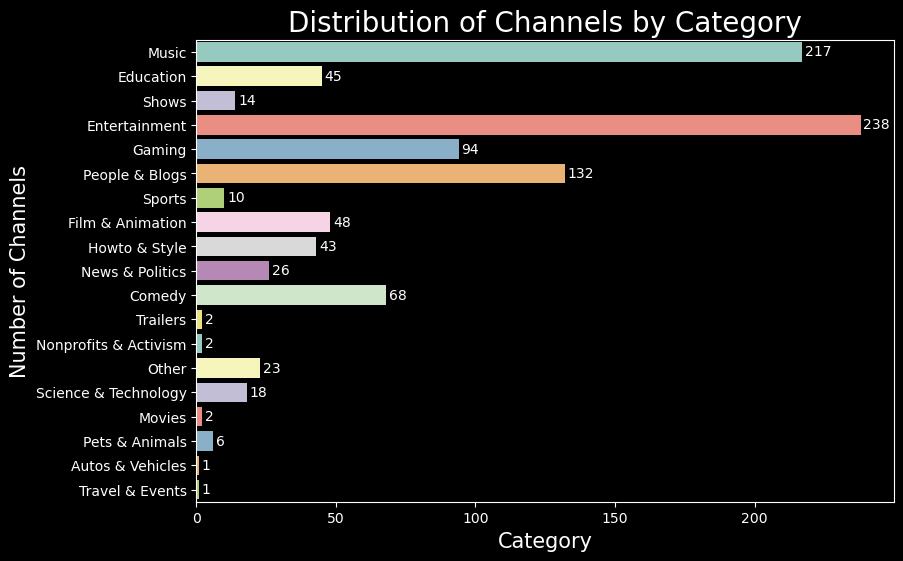

In [32]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df, y='Category', palette='Set3')
plt.title('Distribution of Channels by Category', fontsize=20)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Number of Channels', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

#### Top 5 Categories with Highest Video Views

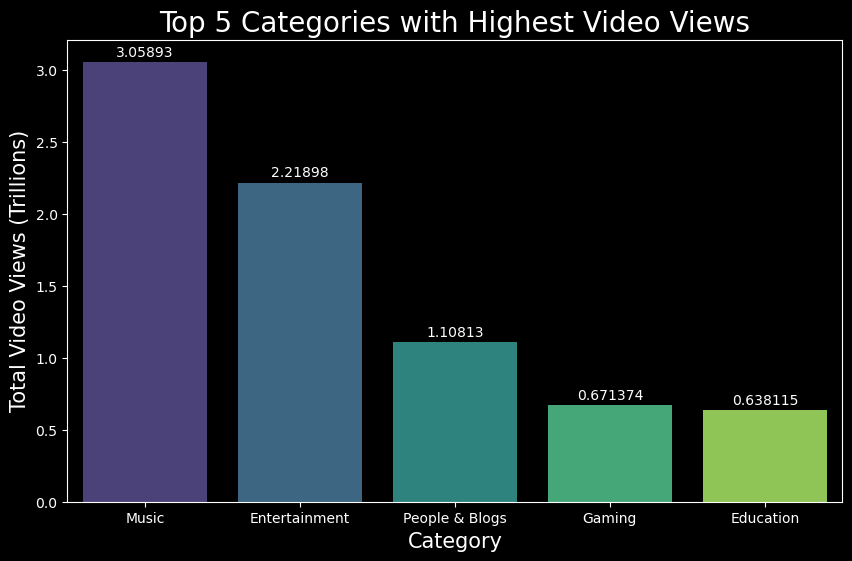

In [33]:
category_views = df.groupby('Category')['Video Views'].sum()
top_categories = category_views.nlargest(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_categories.index, y=top_categories.values / 1e12, palette='viridis')
plt.title('Top 5 Categories with Highest Video Views', fontsize=20)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Total Video Views (Trillions)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

'Music' and 'Entertainment' is the most viewed category on YouTube

#### Top 5 Categories with Highest Subscribers

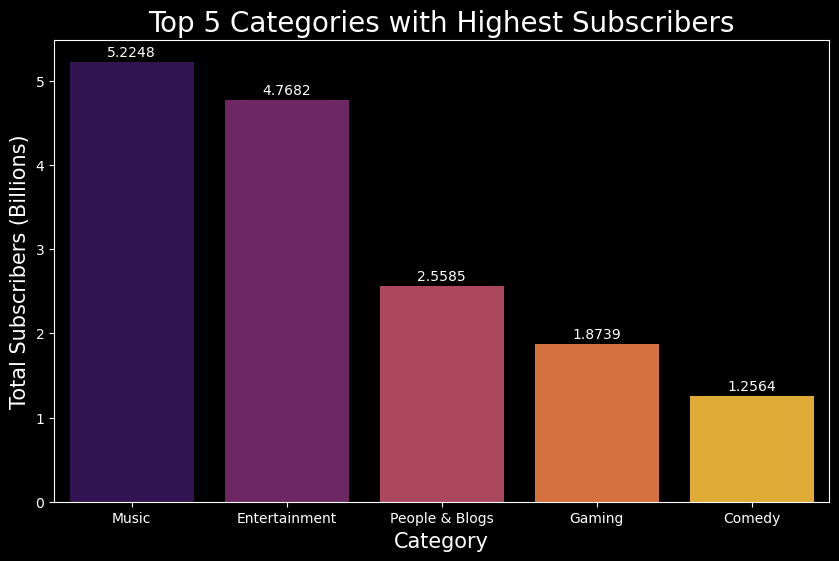

In [34]:
category_subs = df.groupby('Category')['Subscribers'].sum()
top_categories = category_subs.nlargest(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_categories.index, y=top_categories.values / 1e9, palette='inferno')
plt.title('Top 5 Categories with Highest Subscribers', fontsize=20)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Total Subscribers (Billions)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

'Music' and 'Entertainment' categories have the highest subscribers on YouTube

#### Top 5 Channels with Highest Subscribers

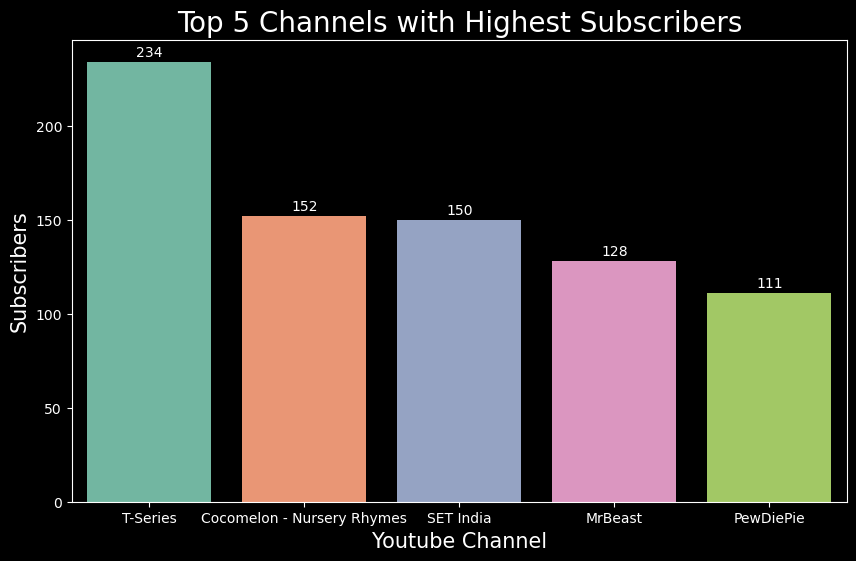

In [35]:
top_channels = df.sort_values(by='Subscribers', ascending=False).head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_channels, x='Youtube Channel', y=top_channels['Subscribers'] / 1e6, palette='Set2')
plt.title('Top 5 Channels with Highest Subscribers', fontsize=20)
plt.xlabel('Youtube Channel', fontsize=15)
plt.ylabel('Subscribers', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

'T-Series' has the highest subsribers on YouTube

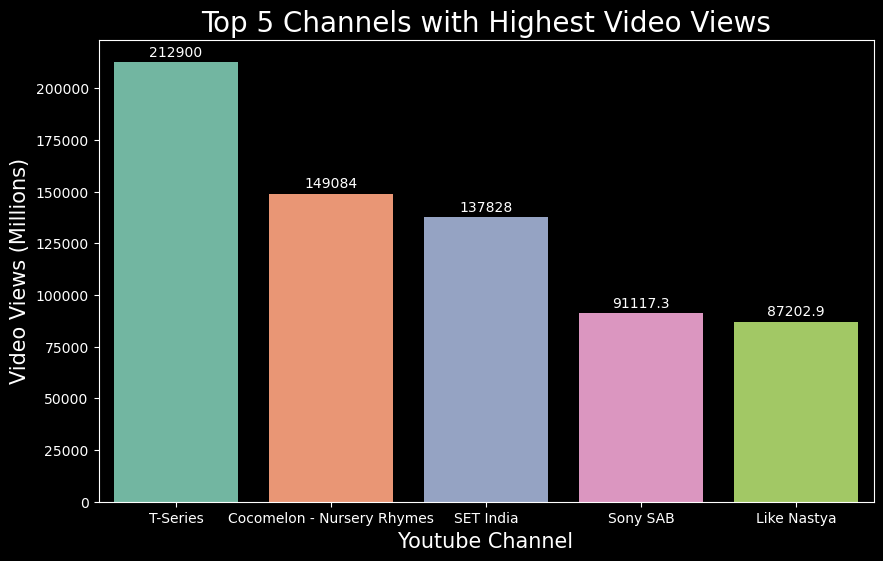

In [36]:
top_channels_views = df.sort_values(by='Video Views', ascending=False).head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_channels_views, x='Youtube Channel', y=top_channels_views['Video Views'] / 1e6, palette='Set2')
plt.title('Top 5 Channels with Highest Video Views', fontsize=20)
plt.xlabel('Youtube Channel', fontsize=15)
plt.ylabel('Video Views (Millions)', fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

'T-Series' has the highest views 212900 Millions on YouTube

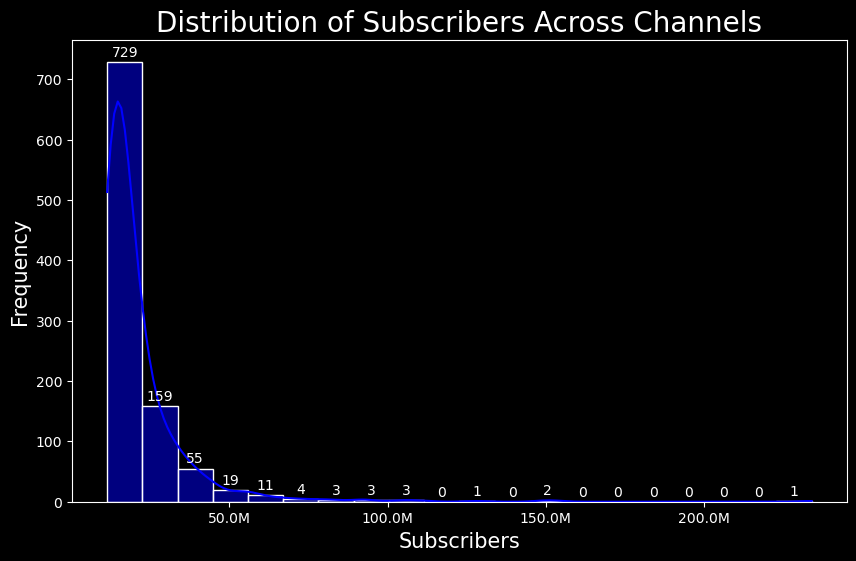

In [37]:

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Subscribers', bins=20, kde=True, color='blue')
plt.title('Distribution of Subscribers Across Channels', fontsize=20)
plt.xlabel('Subscribers', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

millions_formatter = lambda x, pos:f'{x/1e6:.1f}M'

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

for bars in ax.containers:
    ax.bar_label(bars, padding=2)

Most of the channels has less than 0.5 Millions subscribers

### Insights
* In 2014, the popularity of being a YouTuber was at its peak, but it gradually decreased over the years, reaching its lowest point in 2021
* The 'Music' and 'Entertainment' categories are the most popular on YouTube
* 'Music' and 'Entertainment' are the most viewed categories on YouTube
* 'Music' and 'Entertainment' categories have the highest subscribers on YouTube
* 'T-Series' has the highest subsribers on YouTube
* 'T-Series' has the highest views 212900 Millions on YouTube
* Most of the channels has less than 0.5 Millions subscribers
* It is apparent that video views and subscriber numbers are directly related. That means that as the number of subscribers grows, so will the number of video views.